In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "../data/importances/"

In [4]:
import os
os.listdir(PATH)

['genes_brain_rf.csv',
 'lipids_regions_perm.csv',
 'lipids_regions_perm_svm_2.csv',
 'lipids_regions_rf.csv',
 'lipids_regions_rf_2.csv',
 '.ipynb_checkpoints',
 'lipids_brain_rf_2.csv',
 'clf_res_regions_rf.csv',
 'lipids_brain_perm_svm_2.csv',
 'lipids_regions_perm_logreg_2.csv',
 'genes_regions_rf.csv',
 'lipids_brain_perm_logreg_2.csv',
 'lipids_brain_rf.csv']

In [13]:
(pd.read_csv(PATH +  'genes_regions_rf.csv').importance==0).mean()

0.3683430909219158

# Permutations

In [4]:
display(pd.read_csv(PATH + "lipids_brain_perm_logreg_2.csv", index_col=0))
display(pd.read_csv(PATH + "lipids_brain_perm_svm_2.csv", index_col=0))

,feature name,importance
0,39 Frontopolar (BA10fp)_PE_P 41 7,0.0
1,56 Nucleus Accumbens_PI 40 6,0.0
2,56 Nucleus Accumbens_FA 22 5,0.0
3,56 Nucleus Accumbens_FA 22 4,0.0
4,56 Nucleus Accumbens_FA 22 2,0.0
...,...,...
15895,75 Cerebellar White Matter_SM d32 1,0.0
15896,75 Cerebellar White Matter_SM d33 1,0.0
15897,75 Cerebellar White Matter_SM d34 1,0.0
15898,75 Cerebellar White Matter_SM d41 1,0.0


,feature name,importance
0,39 Frontopolar (BA10fp)_PE_P 41 7,0.0
1,56 Nucleus Accumbens_PI 40 6,0.0
2,56 Nucleus Accumbens_FA 22 5,0.0
3,56 Nucleus Accumbens_FA 22 4,0.0
4,56 Nucleus Accumbens_FA 22 2,0.0
...,...,...
15895,75 Cerebellar White Matter_SM d32 1,0.0
15896,75 Cerebellar White Matter_SM d33 1,0.0
15897,75 Cerebellar White Matter_SM d34 1,0.0
15898,75 Cerebellar White Matter_SM d41 1,0.0


In [5]:
display(pd.read_csv(PATH + "lipids_regions_perm_logreg_2.csv", index_col=0))
display(pd.read_csv(PATH + "lipids_regions_perm_svm_2.csv", index_col=0))

,feature name,importance
0,PE_P 41 7,0.0
1,DG 40 4,0.0
2,SM d32 1,0.0
3,DG 36 4,0.0
4,DG 36 3,0.0
...,...,...
313,FA 20 5,0.0
314,FA 21 3,0.0
315,FA 22 0,0.0
316,FA 22 1,0.0


,feature name,importance
0,TG 52 2,0.000100
1,PE_P 37 3,0.000080
2,PC 35 0,0.000008
3,PC_P 30 0,0.000008
4,PC 46 3,0.000078
...,...,...
313,Cer m43 2,-0.000126
314,FA 21 3,-0.000118
315,PC_P 37 1,-0.000118
316,PC 30 0,-0.000108


In [69]:
importances = pd.read_csv(PATH + "lipids_regions_perm_svm_2.csv", index_col=0).sort_values(by="importance", ascending=False)
importances["feature name"] = importances["feature name"].str[:-2] + ':' + importances["feature name"].str[-1]
importances.columns = ["Lipid", "Feature Importance"]
print(importances.head(10).to_latex(index=False))

\begin{tabular}{lr}
\toprule
       Lipid &  Feature Importance \\
\midrule
    TG 60 :0 &            0.007440 \\
    CAR 18:0 &            0.005414 \\
     PG 38:6 &            0.004572 \\
   Cer d40:1 &            0.004076 \\
   PE\_O 40:4 &            0.003410 \\
   Cer m40:1 &            0.003320 \\
    LPE 22:6 &            0.003204 \\
    LPC 16:1 &            0.003154 \\
   PE\_P 41:7 &            0.003126 \\
HexCer d41:1 &            0.003096 \\
\bottomrule
\end{tabular}



# RF

In [28]:
def f(df, to_trim=True):
    df["feature name"] = df["feature name"].str[:-2] + ':' + df["feature name"].str[-1]
    if to_trim:
        df["feature name"] = df["feature name"].str[3:]
    df["Brain region"] = df["feature name"].str.split("_").str[0]
    df["Lipid"] = df["feature name"].str.split("_").str[1:].str.join("_")
    first_output = df[["Brain region", "Lipid", "importance"]].sort_values(by="importance", ascending=False)

    df["region"] = df["feature name"].str.split("_").str[0]
    region_importances = df.groupby("region")["importance"].apply(sum).sort_values(ascending=False)

    region_importances = pd.DataFrame(region_importances).reset_index()
    region_importances.columns = ["Brain region", "Importance"]
    second_output = region_importances
    return first_output, second_output

In [29]:
sns.set_theme()
sns.set(context='paper', palette='Set2', font_scale=2)

In [30]:
rf_lipids_brains_regions = pd.read_csv(PATH +  'lipids_brain_rf.csv', index_col=0)
rf_lipids_brains_regions_2 = pd.read_csv(PATH +  'lipids_brain_rf_2.csv', index_col=0)
first_output, second_output = f(rf_lipids_brains_regions)
first_output_2, second_output_2 = f(rf_lipids_brains_regions_2)

In [45]:
rf_genes_brains_regions = pd.read_csv(PATH + "genes_brain_rf.csv", index_col=0)
first_output_3, second_output_3 = f(rf_genes_brains_regions, True)

In [46]:
regions_lipids_merged = pd.merge(first_output, first_output_2, on=["Brain region", "Lipid"])

In [47]:
regions_lipids_merged.shape

(15900, 4)

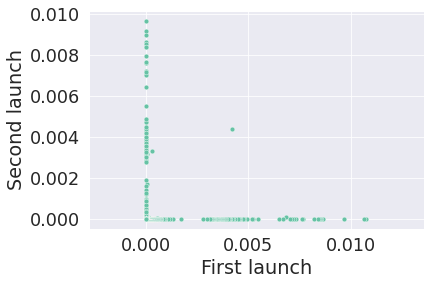

In [48]:
sns.scatterplot(
    x=np.log10(regions_lipids_merged.iloc[:, 2]+1),
    y=np.log10(regions_lipids_merged.iloc[:, 3]+1),
#     s=50
)
plt.xlabel("First launch")
plt.ylabel("Second launch")
plt.axis('equal')
# plt.xscale('log')
# plt.yscale('log')
plt.savefig("../data/pics/importances/lipids_regions_brain_rf_corr.pdf", bbox_inches='tight')

In [61]:
clf_res_regions_rf.columns = ["Brain region", 'accuracy']

In [62]:
regions_merged = pd.merge(clf_res_regions_rf, second_output_3, on="Brain region")

In [66]:
regions_merged

,Brain region,accuracy,Importance
0,1ary Visual Anterior (BA17a),0.928741,0.000000
1,1ary Auditory (BA41/42),0.957921,0.149265
2,1ary Motor (BA4),0.967302,0.000000
3,Supramarginal Posterior (BA40p),0.979434,0.010249
4,Anterior Inferior Temporal (BA20a),0.982278,0.030736
5,Prefrontal Medial (BA10m),0.982630,0.010000
6,Temporopolar (BA38),0.989501,0.009751
7,Insular Posterior Cortex,0.989899,0.020000
8,Dorsolateral Prefrontal (BA9),0.989950,0.000000
9,"2ary Auditory, Wernicke (BA22p)",0.992537,0.040000


In [63]:
from scipy.stats import pearsonr

In [64]:
pearsonr(regions_merged.iloc[:, 1], regions_merged.iloc[:, 2])

PearsonRResult(statistic=-0.019403226218237795, pvalue=0.9219321713664045)

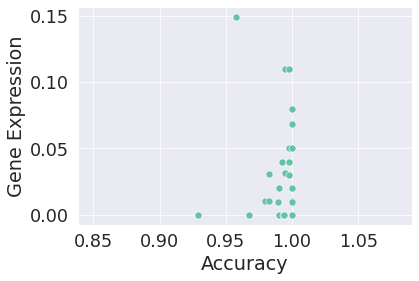

In [68]:
sns.scatterplot(
    x=regions_merged.iloc[:, 1],
    y=regions_merged.iloc[:, 2],
    s=50
)
plt.axis('equal')
plt.xlabel("Accuracy")
plt.ylabel("Gene Expression")
plt.savefig("../data/pics/importances/accuracy_genes_regions.pdf", bbox_inches='tight')

In [50]:
TOP = 400
set((first_output.iloc[:, 0] + first_output.iloc[:, 1])[:TOP]) & set((first_output_2.iloc[:, 0] + first_output_2.iloc[:, 1])[:TOP])

{'Cingulate Posterior (BA31)Cer m41:1',
 'Corpus Callosum PosteriorPC 28:0',
 'Dorsolateral Prefrontal (BA46)PE 42 :0',
 'Dorsolateral Prefrontal (BA46)TG 56:5',
 'Insular Posterior CortexPG 34:2',
 'Internal CapsuleSulfoHexCer d44:2',
 'Orbitofrontal (BA47)SM d32:0',
 'Orbitofrontal (BA47)SM d42:1',
 'Premotor Anterior Lateral (BA6a)SM d33:1',
 'Temporopolar (BA38)TG 54:4'}

In [33]:
set(second_output.iloc[:10, 0]) & set(second_output_2.iloc[:10, 0])

{'Cingulate Posterior (BA31)',
 'Corpus Callosum Posterior',
 'Medial Dorsal Thalamus',
 'Premotor Medial (BA6m)'}

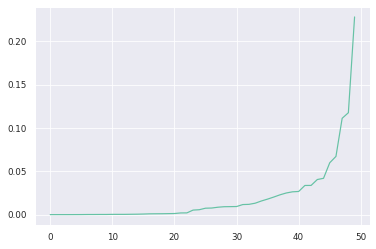

In [34]:
plt.plot(second_output.Importance.values[::-1])

In [71]:
rf_lipids_regions = pd.read_csv(PATH + 'lipids_regions_rf_2.csv', index_col=0).sort_values(by="importance", ascending=False)
rf_lipids_regions["feature name"] = rf_lipids_regions["feature name"].str[:-2] + ':' + rf_lipids_regions["feature name"].str[-1]

rf_lipids_regions.columns = ["Lipid", "Importance"]
print(rf_lipids_regions[:10].to_latex(index=False))

\begin{tabular}{lr}
\toprule
    Lipid &  Importance \\
\midrule
 LPE 22:4 &    0.079455 \\
 LPE 18:1 &    0.053591 \\
 LPE 20:2 &    0.039456 \\
 LPE 20:4 &    0.025774 \\
  DG 38:1 &    0.016370 \\
 LPE 20:1 &    0.016329 \\
PC\_P 38:6 &    0.015786 \\
  TG 50:3 &    0.015702 \\
PC\_P 38:2 &    0.015282 \\
  PC 34:0 &    0.014011 \\
\bottomrule
\end{tabular}



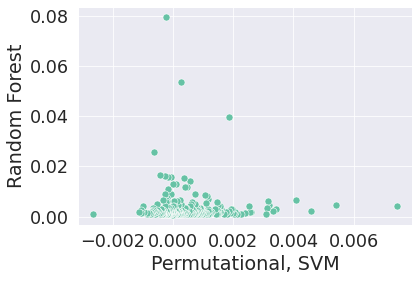

In [80]:
regions_merged = pd.merge(importances, rf_lipids_regions, on='Lipid')
sns.scatterplot(
    x=(regions_merged.iloc[:, 1]),
    y=regions_merged.iloc[:, 2],
    s=50
)
# plt.axis('equal')
plt.xlabel("Permutational, SVM")
plt.ylabel("Random Forest")
plt.savefig("../data/pics/importances/lipids_svm_rf.pdf", bbox_inches='tight')

In [56]:
clf_res_regions_rf = pd.read_csv(PATH + "clf_res_regions_rf.csv", index_col=0)
# print(clf_res_regions_rf[clf_res_regions_rf.accuracy == 1].to_latex(index=False))

In [58]:
second_output_3, clf_res_regions_rf

,Brain region,Importance
0,Pulvinar Thalamus,0.140852
1,Posterior Superior Parietal (BA7p),0.128967
2,Cingulate Posterior (BA23a),0.128029
3,Amygdala,0.085712
4,Supramarginal Posterior (BA40p),0.072887
5,Insular Anterior Cortex,0.057657
6,Anterior Prefrontal (BA10),0.048257
7,"Hippocampus, CA1",0.044535
8,"2ary Auditory, language (BA22a)",0.032028
9,Anterior Superior Parietal (BA5/BA7a),0.030333


In [57]:
clf_res_regions_rf

,Region,accuracy
0,1ary Visual Anterior (BA17a),0.928741
1,1ary Auditory (BA41/42),0.957921
2,Dorsolateral Prefrontal (BA46),0.960212
3,1ary Motor (BA4),0.967302
4,Anterior Middle Temporal (BA37-aMT),0.973753
5,Anterior Supramarginal (BA40a),0.973872
6,Anterior Superior Parietal (BA5/BA7a),0.977500
7,Posterior Middle Temporal (BA37-pMT),0.979070
8,Supramarginal Posterior (BA40p),0.979434
9,Insular Anterior Cortex,0.980100


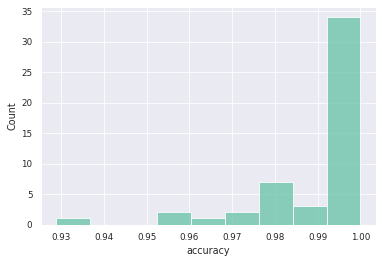

In [51]:
sns.histplot(clf_res_regions_rf.accuracy)
plt.savefig("../data/pics/importances/clf_res_regions_rf.pdf", bbox_inches='tight')
plt.savefig("../data/pics/importances/clf_res_regions_rf.png", bbox_inches='tight')

In [60]:
genes_brain_rf = pd.read_csv(PATH + "genes_brain_rf.csv", index_col=0).sort_values(by="importance", ascending=False)
genes_brain_rf["feature name"] = genes_brain_rf["feature name"].str[3:]

display(genes_brain_rf.importance.value_counts())
print(496093 / genes_brain_rf.shape[0] * 100)
print(genes_brain_rf[:10].to_latex(index=False))

0.000000    496093
0.010000        80
0.020000         6
0.009751         3
0.000249         3
0.009753         2
0.000247         2
0.009751         1
0.009512         1
0.008821         1
0.001179         1
0.000488         1
0.000249         1
Name: importance, dtype: int64

99.97944356553371
\begin{tabular}{lr}
\toprule
                                      feature name &  importance \\
\midrule
                           Putamen\_ENSG00000133657 &        0.02 \\
                  Substantia Nigra\_ENSG00000170011 &        0.02 \\
              Orbitofrontal (BA11)\_ENSG00000280165 &        0.02 \\
        Cingulate Posterior (BA31)\_ENSG00000111077 &        0.02 \\
                  Precuneus (BA7m)\_ENSG00000102753 &        0.02 \\
      1ary Somatosensory (BA3/1/2)\_ENSG00000162426 &        0.02 \\
        Cingulate Posterior (BA31)\_ENSG00000173269 &        0.01 \\
          Insular Posterior Cortex\_ENSG00000189292 &        0.01 \\
         Cingulate Anterior (BA32)\_ENSG00000090539 &        0.01 \\
2ary/3ary Visual Anterior (BA18/19a)\_ENSG000001... &        0.01 \\
\bottomrule
\end{tabular}



In [61]:
print(
    pd.DataFrame(
        [
            [0.0, 496093],
            ["between 0.0 and 0.1", 16],
            [0.1, 80],
            [0.2, 6]
        ], columns=["Importance", "Number of Features with that importance"]
    ).to_latex(index=False)
)

\begin{tabular}{lr}
\toprule
         Importance &  Number of Features with that importance \\
\midrule
                0.0 &                                   496093 \\
between 0.0 and 0.1 &                                       16 \\
                0.1 &                                       80 \\
                0.2 &                                        6 \\
\bottomrule
\end{tabular}



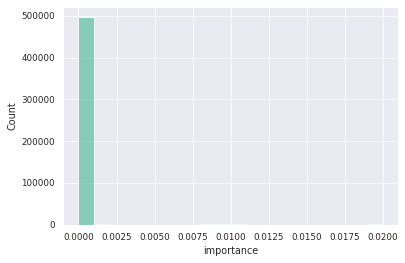

In [62]:
sns.histplot(genes_brain_rf.importance)

In [66]:
genes_brain_rf["region"] = genes_brain_rf["feature name"].str.split("_").str[0]
region_importances = genes_brain_rf.groupby("region")["importance"].apply(sum).sort_values(ascending=False)
region_importances = pd.DataFrame(region_importances).reset_index()
region_importances.columns = ["Brain region", "Importance"]
print(region_importances[:10].to_latex(index=False))

\begin{tabular}{lr}
\toprule
                   Brain region &  Importance \\
\midrule
        1ary Auditory (BA41/42) &    0.149265 \\
   1ary Somatosensory (BA3/1/2) &    0.110000 \\
     Cingulate Posterior (BA31) &    0.110000 \\
               Substantia Nigra &    0.080000 \\
        Cerebellar White Matter &    0.068574 \\
              Nucleus Accumbens &    0.050000 \\
      Cingulate Anterior (BA24) &    0.050000 \\
           Orbitofrontal (BA11) &    0.040000 \\
2ary Auditory, Wernicke (BA22p) &    0.040000 \\
                        Putamen &    0.031179 \\
\bottomrule
\end{tabular}



In [68]:
grid = np.linspace(-10, 10, 1000)

In [97]:
plt.rcParams['text.usetex'] = False

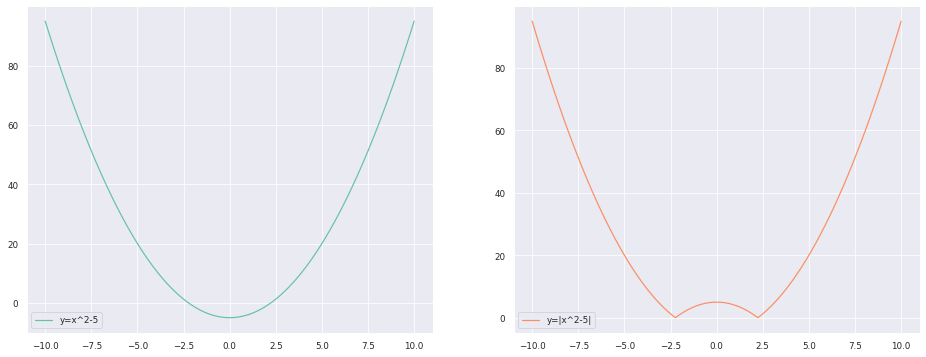

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(8*2, 6))
ax1.plot(grid, np.abs(4 - 3 * grid), c="C0", label=r'y=x^2-5')
# ax1.set_ylim(-2, 2)
ax1.legend()
ax2.plot(grid, 4 * grid - 10, c="C1", label="y=|x^2-5|")
# ax2.set_ylim(-2, 2)
ax2.legend()

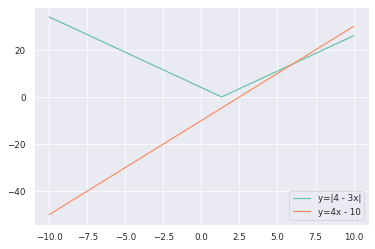

In [101]:
plt.plot(grid, np.abs(4 - 3 * grid), c="C0", label=r'y=|4 - 3x|')
plt.plot(grid, 4 * grid - 10, c="C1", label="y=4x - 10")
plt.legend()